In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
item_categories = pd.read_csv('../data/item_categories.csv')
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [50]:
shops = pd.read_csv('../data/shops.csv')
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [51]:
items = pd.read_csv('../data/items.csv')
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [52]:
sales_train = pd.read_csv('../data/sales_train.csv')
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [53]:
shops['city'] = shops['shop_name'].str.extract(r'(\w+\.*\w*)')
shops.head()

,shop_name,shop_id,city
0,"!Якутск Орджоникидзе, 56 фран",0,Якутск
1,"!Якутск ТЦ ""Центральный"" фран",1,Якутск
2,"Адыгея ТЦ ""Мега""",2,Адыгея
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха
4,"Волжский ТЦ ""Волга Молл""",4,Волжский


In [54]:
items_with_categories = items.merge(item_categories, how='outer', on='item_category_id')
items_with_categories.head()

,item_name,item_id,item_category_id,item_category_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD
2,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD
3,***КОРОБКА (СТЕКЛО) D,4,40,Кино - DVD
4,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40,Кино - DVD


In [62]:
data = sales_train.merge(shops.iloc[:, 1:], on='shop_id')
data = data.merge(items_with_categories.drop(columns='item_name'), on='item_id')
data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,city,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.0,1.0,Ярославль,37,Кино - Blu-Ray
1,02.01.2013,0,25,22154,999.0,1.0,Москва,37,Кино - Blu-Ray
2,03.01.2013,0,25,22154,999.0,1.0,Москва,37,Кино - Blu-Ray
3,20.01.2013,0,25,22154,999.0,1.0,Москва,37,Кино - Blu-Ray
4,23.01.2013,0,25,22154,999.0,1.0,Москва,37,Кино - Blu-Ray


In [63]:
data[data['item_cnt_day'] < 0].shape

(7356, 9)

In [64]:
data[data['item_price'] < 0].shape

(1, 9)

* There is negatives in price and num of sold items fields

In [65]:
data.loc[data.item_cnt_day < 1, "item_cnt_day"] = 0
data = data[data.item_price > 0].reset_index(drop = True)

### Check missing values and duplicates

In [66]:
data.isnull().sum()

date                  0
date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
city                  0
item_category_id      0
item_category_name    0
dtype: int64

Omg... no missing values

In [67]:
data.duplicated().sum()

6

In [68]:
data = data.drop_duplicates().reset_index(drop=True)
data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,city,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.0,1.0,Ярославль,37,Кино - Blu-Ray
1,02.01.2013,0,25,22154,999.0,1.0,Москва,37,Кино - Blu-Ray
2,03.01.2013,0,25,22154,999.0,1.0,Москва,37,Кино - Blu-Ray
3,20.01.2013,0,25,22154,999.0,1.0,Москва,37,Кино - Blu-Ray
4,23.01.2013,0,25,22154,999.0,1.0,Москва,37,Кино - Blu-Ray


In [69]:
data.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
count,2.935842e+06,2.935842e+06,2.935842e+06,2.935842e+06,2.935842e+06,2.935842e+06
mean,1.456992e+01,3.300171e+01,1.019723e+04,8.908538e+02,1.245210e+00,4.000141e+01
std,9.422992e+00,1.622698e+01,6.324292e+03,1.729802e+03,2.617049e+00,1.710076e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e-02,0.000000e+00,0.000000e+00
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,2.800000e+01
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,4.000000e+01
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,5.500000e+01
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,8.300000e+01


In [74]:
print(items.item_name.nunique())
items.shape

22170


(22170, 3)

In [78]:
print(shops.shop_name.nunique())
shops.shape

60


(60, 3)

Text(0.5, 1.0, 'City Distribution')

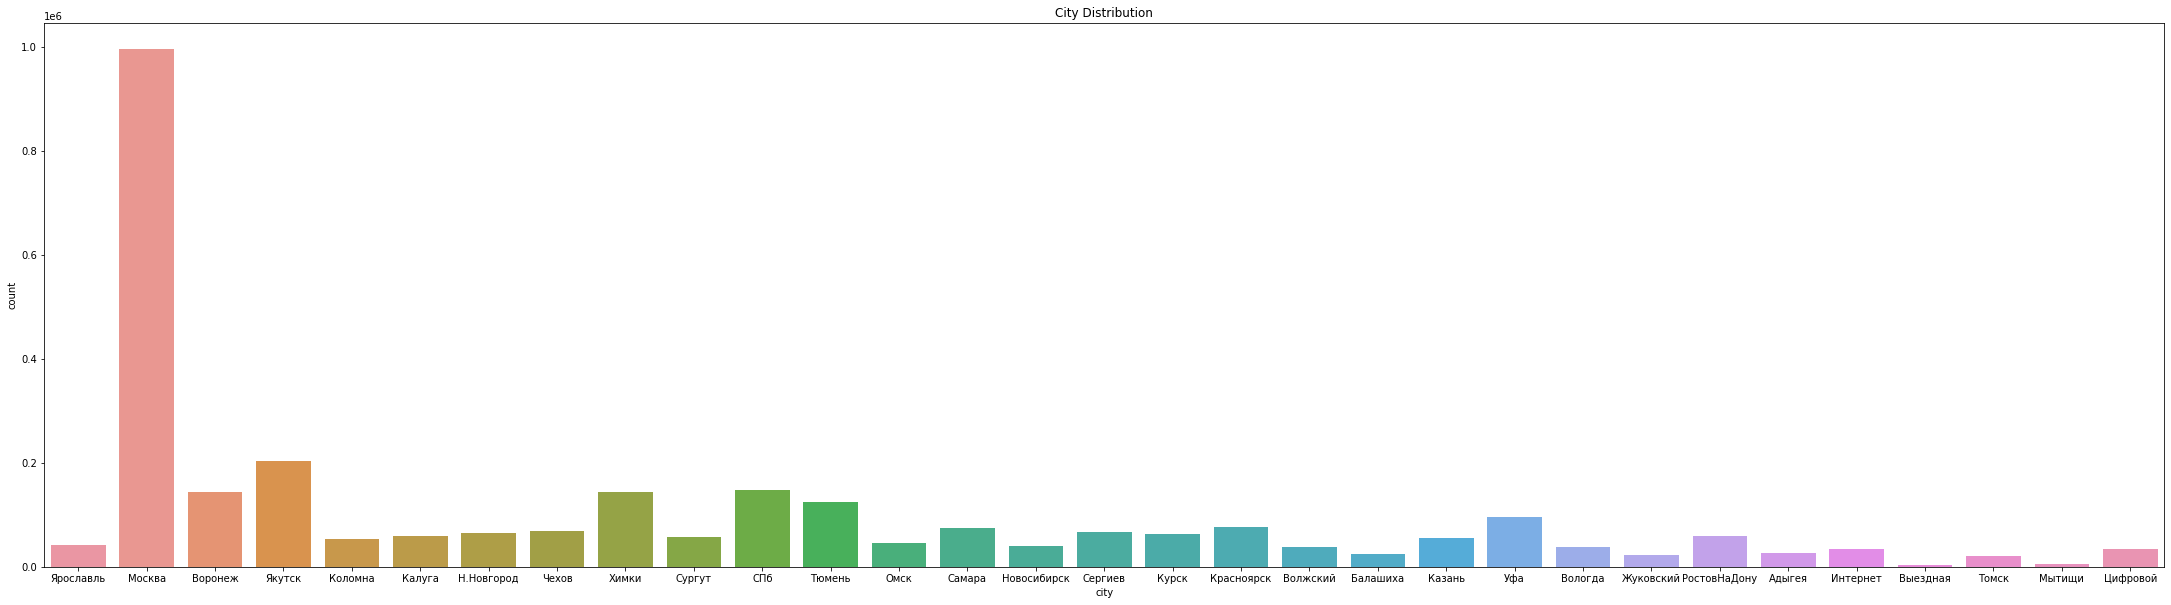

In [83]:
fig = plt.figure(figsize=(38, 10))
sns.countplot(x='city', data=data)
plt.title('City Distribution')

Text(0.5, 1.0, 'Category Distribution')

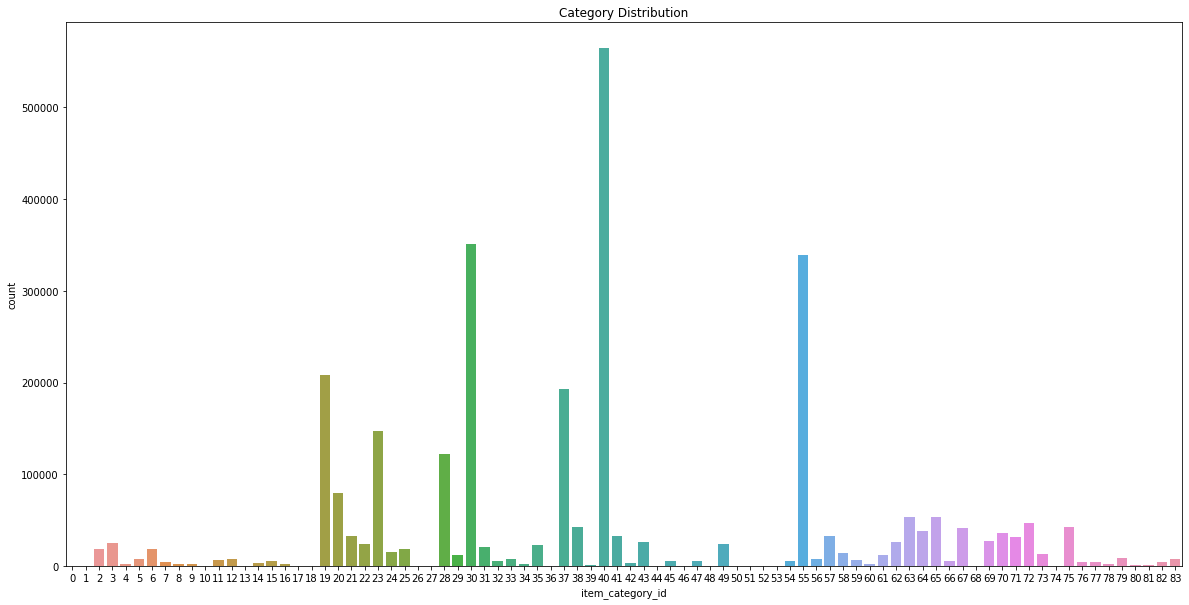

In [89]:
fig = plt.figure(figsize=(20, 10))
sns.countplot(x='item_category_id', data=data)
plt.title('Category Distribution')

In [95]:
cat_tuple = (19, 23, 28, 30, 37, 40, 55)
for i in cat_tuple:
    print(data[data.item_category_id == i].item_category_name.unique())

['Игры - PS3']
['Игры - XBOX 360']
['Игры PC - Дополнительные издания']
['Игры PC - Стандартные издания']
['Кино - Blu-Ray']
['Кино - DVD']
['Музыка - CD локального производства']


In [96]:
data.item_category_name.unique()

array(['Кино - Blu-Ray', 'Кино - DVD', 'Аксессуары - PSVita',
       'Аксессуары - PS3', 'Игры PC - Стандартные издания', 'Игры - PS3',
       'Музыка - CD локального производства',
       'Музыка - Музыкальное видео', 'Игры - PSVita', 'Игры - XBOX 360',
       'Игры - PSP', 'Подарки - Гаджеты, роботы, спорт',
       'Игры PC - Дополнительные издания', 'Карты оплаты - PSN',
       'Программы - Для дома и офиса', 'Игры PC - Коллекционные издания',
       'Подарки - Мягкие игрушки', 'Кино - Blu-Ray 3D',
       'Аксессуары - XBOX 360', 'Игровые консоли - XBOX 360',
       'Карты оплаты - Live!', 'Подарки - Сувениры',
       'Игры - Аксессуары для игр', 'Игровые консоли - PSP',
       'Аксессуары - PSP', 'Музыка - CD фирменного производства',
       'Книги - Методические материалы 1С', 'Кино - Коллекционное',
       'Музыка - MP3', 'Подарки - Настольные игры',
       'Подарки - Настольные игры (компактные)', 'Подарки - Развитие',
       'Подарки - Фигурки', 'Элементы питания', 'Аксессуары 

In [98]:
data.item_id.nunique()

21807

Text(0.5, 1.0, 'Month Distribution')

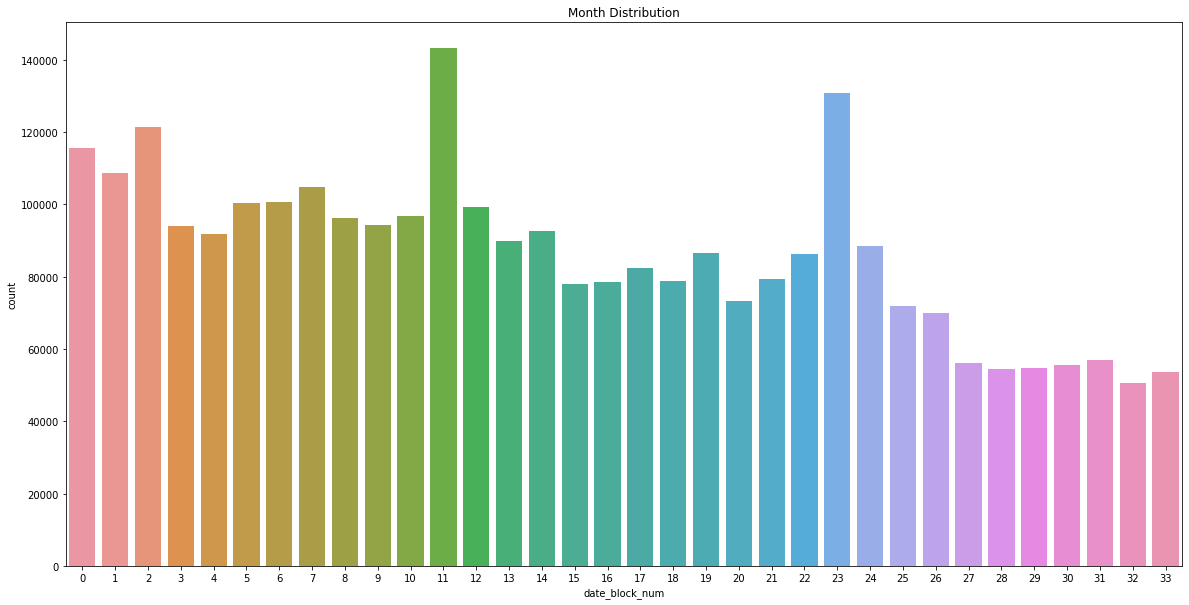

In [99]:
fig = plt.figure(figsize=(20, 10))
sns.countplot(x='date_block_num', data=data)
plt.title('Month Distribution')

Text(0.5, 1.0, 'Price Distribution')

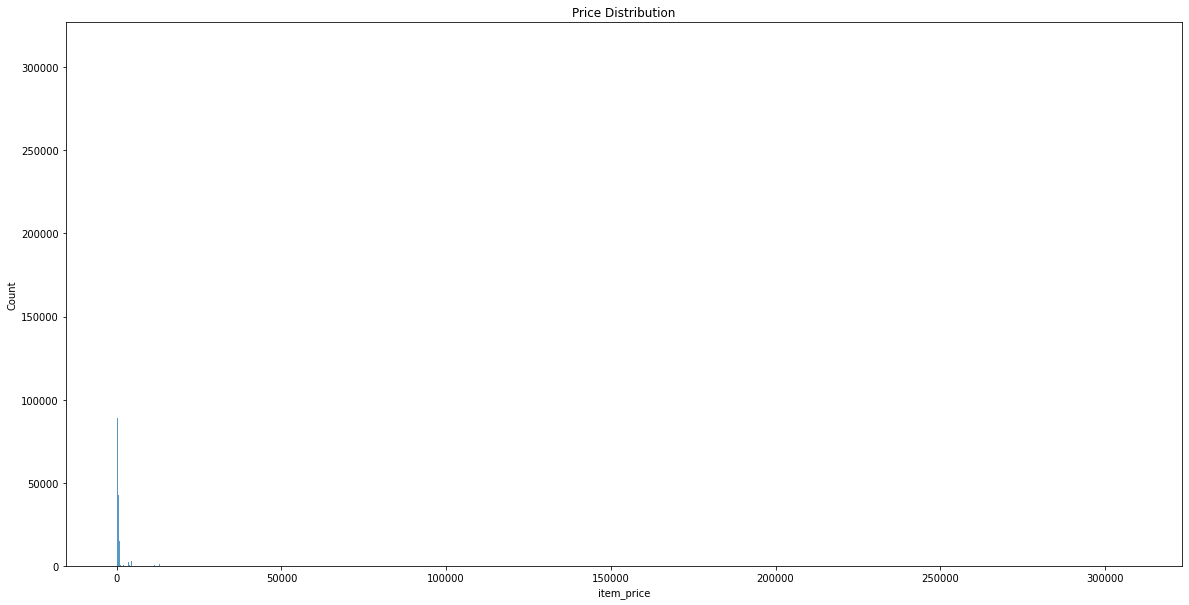

In [104]:
fig = plt.figure(figsize=(20, 10))
sns.histplot(x=data['item_price'])
plt.title('Price Distribution')

Text(0.5, 1.0, 'Price Distribution')

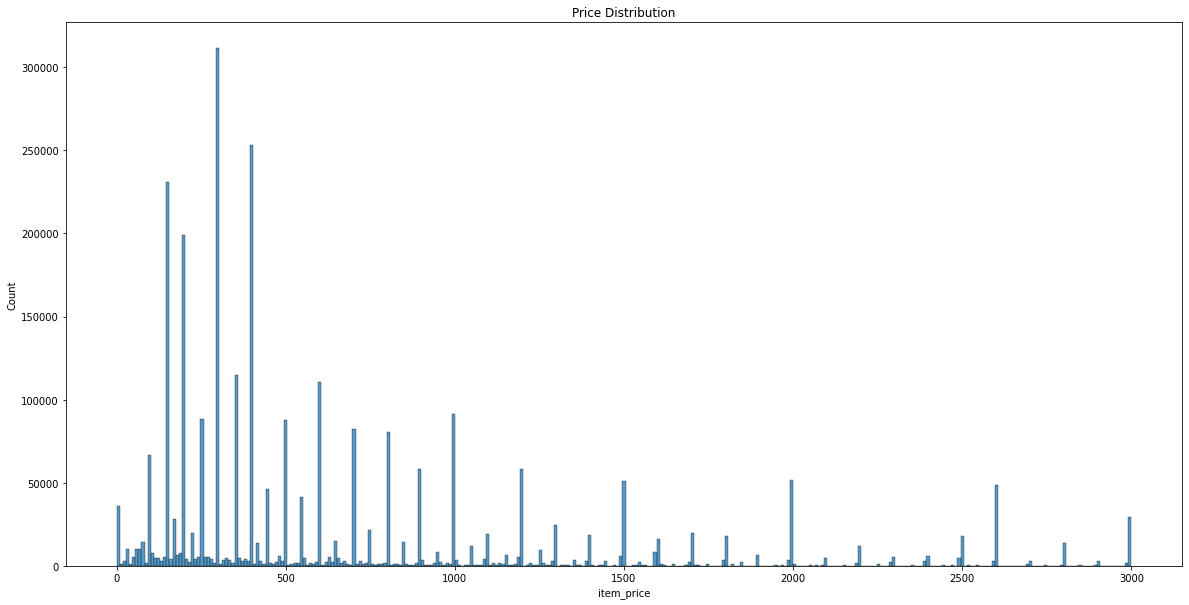

In [114]:
fig = plt.figure(figsize=(20, 10))
sns.histplot(x=data[data.item_price < 3000].reset_index(drop=True)['item_price'])
plt.title('Price Distribution')

In [118]:
data.item_price.mode()

0    299.0
Name: item_price, dtype: float64

In [159]:
data['date']= pd.to_datetime(data['date'])
data['weekday'] = data['date'].dt.day_name()
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,city,item_category_id,item_category_name,weekday,year,month,day
0,2013-02-01,0,59,22154,999.0,1.0,Ярославль,37,Кино - Blu-Ray,Friday,2013,2,1
1,2013-02-01,0,25,22154,999.0,1.0,Москва,37,Кино - Blu-Ray,Friday,2013,2,1
2,2013-03-01,0,25,22154,999.0,1.0,Москва,37,Кино - Blu-Ray,Friday,2013,3,1
3,2013-01-20,0,25,22154,999.0,1.0,Москва,37,Кино - Blu-Ray,Sunday,2013,1,20
4,2013-01-23,0,25,22154,999.0,1.0,Москва,37,Кино - Blu-Ray,Wednesday,2013,1,23


Text(0.5, 1.0, 'Weekday Distribution')

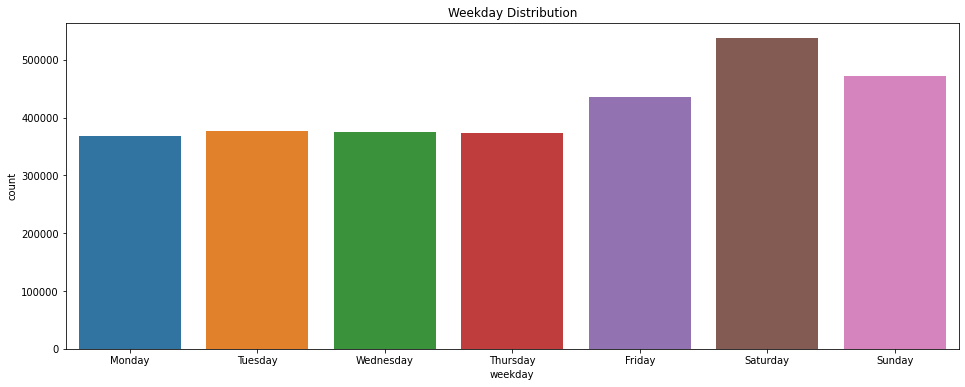

In [156]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
fig = plt.figure(figsize=(16, 6))
sns.countplot(x='weekday', data=data, order=days)
plt.title('Weekday Distribution')

Text(0.5, 1.0, 'Day Distribution')

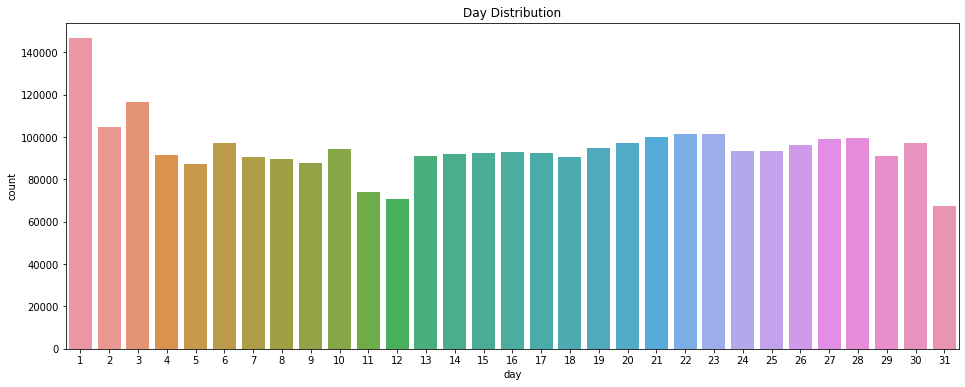

In [162]:
fig = plt.figure(figsize=(16, 6))
sns.countplot(x='day', data=data)
plt.title('Day Distribution')